In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bigger font
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
# Figure size®
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 2.5
rcParams['lines.marker'] = '.'
rcParams['lines.linewidth'] = 1
rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 10
rcParams['axes.titlesize'] = 16
# plt.rc('figure.subplot', wspace=.33)
# Slides
from notebook.services.config import ConfigManager
cm = ConfigManager()
# cm.update('livereveal', {'width': 1024, 'height': 768, 'scroll': True, 'theme': 'simple', 'transition': 'linear'});
# np.random.seed(123)

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"  # print not only the last variable
%config InlineBackend.figure_format ='retina'  # retine quality plots

In [2]:
data_energy = pd.read_csv("data/energy.csv")
print(data_energy.shape)
data_energy.head(3)

(1292, 40)


,country,iso_code,year,gdp,population,electricity_generation,per_capita_electricity,biofuel_electricity,coal_electricity,gas_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
0,Algeria,DZA,2000,252000000000,31042000,23.890,769.587,0.0,0.0,23.837,...,99.778,0.0,0.222,0.0,0.0,0.0,-3.681,-11.462,1.190,9662.271
1,Algeria,DZA,2001,252000000000,31452000,25.031,795.836,0.0,0.0,24.963,...,99.728,0.0,0.272,0.0,0.0,0.0,3.622,10.865,1.233,9881.754
2,Algeria,DZA,2002,266000000000,31855000,25.992,815.933,0.0,0.0,25.936,...,99.785,0.0,0.215,0.0,0.0,0.0,3.584,11.140,1.210,10106.442


## Renewable energy

In [3]:
country = 'Sweden'
resources_columns = [
 'solar_consumption',
 'wind_consumption',
 'hydro_consumption',
 'biofuel_consumption',
]
data_renewable = data_energy[data_energy['country'] == country].set_index('year')[resources_columns]
data_renewable.head(2)

,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption
year,,,,
2000,0.003,1.269,218.289,0.0
2001,0.006,1.330,218.188,0.0


In [4]:
data_renewable.describe()

,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption
count,17.000000,17.000000,17.000000,17.000000
mean,0.058353,12.141176,178.481294,4.604471
std,0.099688,13.556466,20.967069,4.686111
min,0.003000,1.269000,145.862000,0.000000
25%,0.005000,2.301000,164.012000,0.000000
50%,0.011000,5.269000,173.794000,3.476000
75%,0.049000,18.455000,190.522000,7.535000
max,0.360000,41.154000,218.289000,15.458000


In [5]:
# normalized_df = (data_renewable - data_renewable.min()) / (data_renewable.max() - data_renewable.min())
# normalized_df.head(2)

In [6]:
# normalized_df['sum'] = normalized_df['solar_consumption'] + normalized_df['wind_consumption'] + normalized_df['hydro_consumption'] + normalized_df['biofuel_consumption']
# normalized_df

## Improvement measure

In [7]:
ts = data_renewable['solar_consumption']

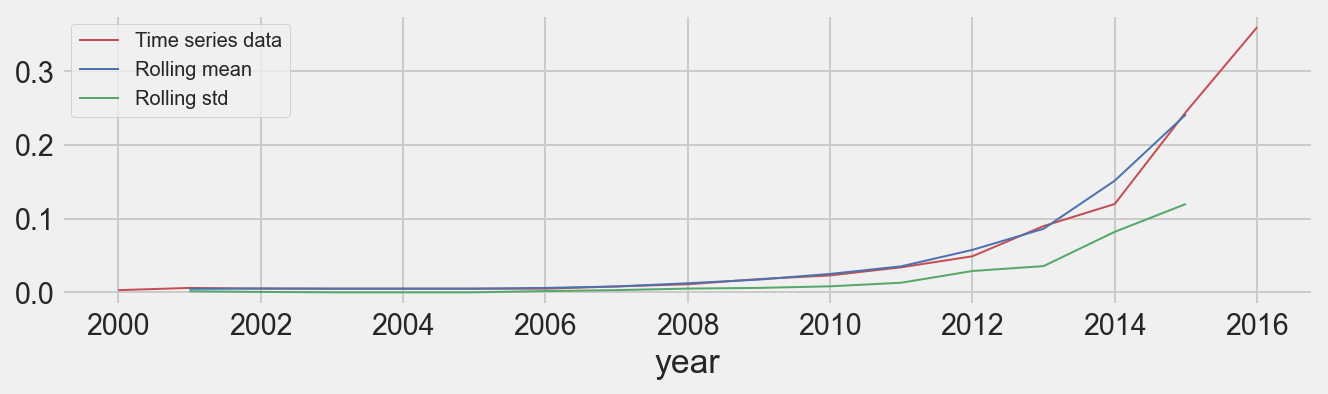

In [8]:
rolling_data = ts.rolling(3,center = True)

plt.figure()
plt.plot(ts,'r-',label = "Time series data") # original data
plt.plot(rolling_data.mean(),'b-',label = "Rolling mean") # rolling mean
plt.plot(rolling_data.std(),'g-',label = "Rolling std") # rolling standard deviation
plt.xlabel('year')
# plt.ylabel(')
# plt.title('')
plt.legend();

In [9]:
rolling_data.mean().to_list()[-2]

0.24166666666666667

## Last Known Consumption Dataset

In [10]:
data_energy_year = data_energy[data_energy['year'] == 2016]
data_energy_year

,country,iso_code,year,gdp,population,electricity_generation,per_capita_electricity,biofuel_electricity,coal_electricity,gas_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
16,Algeria,DZA,2016,534000000000,40551000,66.755,1646.200,0.000,0.000,66.423,...,99.503,0.000,0.323,0.000,0.130,0.043,-0.107,-0.663,1.155,15210.944
33,Argentina,ARG,2016,820000000000,43508000,139.362,3203.131,1.214,1.977,76.574,...,54.946,15.752,21.100,5.509,0.010,0.393,-0.268,-2.669,1.211,22832.315
50,Australia,AUS,2016,1070000000000,24263000,243.120,10020.199,3.722,154.279,46.128,...,18.973,2.287,6.178,0.000,2.554,5.018,0.784,12.718,1.527,67349.654
67,Austria,AUT,2016,395000000000,8747000,65.256,7460.373,4.780,2.043,8.488,...,13.007,5.583,61.253,0.000,1.680,8.022,3.308,12.739,1.007,45481.414
84,Azerbaijan,AZE,2016,145000000000,9736000,23.567,2420.633,0.174,0.000,10.676,...,45.299,45.489,8.228,0.000,0.149,0.098,-0.965,-1.650,1.168,17394.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,United Arab Emirates,ARE,2016,657000000000,9361000,121.846,13016.344,0.006,0.000,121.527,...,99.738,0.003,0.000,0.000,0.254,0.001,3.862,48.110,1.969,138225.234
1240,United Kingdom,GBR,2016,2580000000000,66298000,334.820,5050.235,28.651,30.669,143.356,...,42.816,2.229,1.611,21.422,3.109,11.097,-1.191,-26.831,0.863,33577.337
1257,United States,USA,2016,17200000000000,323016000,4095.487,12678.899,62.760,1239.149,1391.114,...,33.967,0.927,6.376,19.673,1.340,5.543,-0.142,-36.446,1.486,79130.818
1274,Uzbekistan,UZB,2016,287000000000,31442000,56.004,1781.191,0.000,10.784,36.679,...,65.493,2.291,12.953,0.000,0.008,0.000,-5.767,-30.280,1.724,15735.437


In [11]:
data_energy_year

,country,iso_code,year,gdp,population,electricity_generation,per_capita_electricity,biofuel_electricity,coal_electricity,gas_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
16,Algeria,DZA,2016,534000000000,40551000,66.755,1646.200,0.000,0.000,66.423,...,99.503,0.000,0.323,0.000,0.130,0.043,-0.107,-0.663,1.155,15210.944
33,Argentina,ARG,2016,820000000000,43508000,139.362,3203.131,1.214,1.977,76.574,...,54.946,15.752,21.100,5.509,0.010,0.393,-0.268,-2.669,1.211,22832.315
50,Australia,AUS,2016,1070000000000,24263000,243.120,10020.199,3.722,154.279,46.128,...,18.973,2.287,6.178,0.000,2.554,5.018,0.784,12.718,1.527,67349.654
67,Austria,AUT,2016,395000000000,8747000,65.256,7460.373,4.780,2.043,8.488,...,13.007,5.583,61.253,0.000,1.680,8.022,3.308,12.739,1.007,45481.414
84,Azerbaijan,AZE,2016,145000000000,9736000,23.567,2420.633,0.174,0.000,10.676,...,45.299,45.489,8.228,0.000,0.149,0.098,-0.965,-1.650,1.168,17394.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,United Arab Emirates,ARE,2016,657000000000,9361000,121.846,13016.344,0.006,0.000,121.527,...,99.738,0.003,0.000,0.000,0.254,0.001,3.862,48.110,1.969,138225.234
1240,United Kingdom,GBR,2016,2580000000000,66298000,334.820,5050.235,28.651,30.669,143.356,...,42.816,2.229,1.611,21.422,3.109,11.097,-1.191,-26.831,0.863,33577.337
1257,United States,USA,2016,17200000000000,323016000,4095.487,12678.899,62.760,1239.149,1391.114,...,33.967,0.927,6.376,19.673,1.340,5.543,-0.142,-36.446,1.486,79130.818
1274,Uzbekistan,UZB,2016,287000000000,31442000,56.004,1781.191,0.000,10.784,36.679,...,65.493,2.291,12.953,0.000,0.008,0.000,-5.767,-30.280,1.724,15735.437


In [12]:
data_energy_year['solar_consumption'].describe()

count     76.000000
mean      10.670197
std       29.915734
min        0.000000
25%        0.095000
50%        0.615000
75%        4.085750
max      167.304000
Name: solar_consumption, dtype: float64

In [13]:
intervals = pd.qcut(data_energy_year['solar_consumption'], 3, labels=['Low', 'Medium', 'High'])
intervals

16      Medium
33         Low
50        High
67        High
84         Low
         ...  
1223    Medium
1240      High
1257      High
1274       Low
1291       Low
Name: solar_consumption, Length: 76, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [14]:
intervals.isnull().values.any()

False

In [15]:
data_energy_year['consumption_type'] = intervals
energy_dataset_types = data_energy_year[['country', 'solar_consumption', 'consumption_type']]
energy_dataset_types[energy_dataset_types['country'] == 'Colombia']

,country,solar_consumption,consumption_type
237,Colombia,0.0,Low


In [16]:
# energy_dataset_types.to_csv('dataset_types.csv', index=False)

## Merging with datagov

In [17]:
data_gov = pd.read_csv("data/WGI.csv")
# d = pd.to_datetime(data_gov['year']).dt.to_period('Y')
data_gov = data_gov.set_index('year')

In [18]:
data_gov_year = data_gov[data_gov.index == 2016]
data_gov_year

,country,iso_code,VoiceandAccountability,Political StabilityNoViolence,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption
year,,,,,,,,
2016,Algeria,DZA,-0.862889,-1.097526,-0.531304,-1.171879,-0.857604,-0.677760
2016,Argentina,ARG,0.493351,0.204626,0.161878,-0.469625,-0.393747,-0.283931
2016,Australia,AUS,1.353702,1.047958,1.568043,1.896966,1.755667,1.816108
2016,Austria,AUT,1.337481,0.909639,1.510521,1.440436,1.800264,1.539869
2016,Azerbaijan,AZE,-1.561036,-0.803879,-0.165814,-0.282023,-0.520019,-0.838362
...,...,...,...,...,...,...,...,...
2016,United Arab Emirates,ARE,-1.050371,0.564749,1.415485,0.972596,0.849066,1.171737
2016,United Kingdom,GBR,1.295399,0.360454,1.609554,1.760709,1.678407,1.895578
2016,United States,USA,1.110259,0.402303,1.476340,1.497076,1.618124,1.373549


In [19]:
data_gov_year['RegulatoryQuality'].describe()

count    76.000000
mean      0.565772
std       1.005404
min      -2.090988
25%      -0.143587
50%       0.649394
75%       1.386829
max       2.180612
Name: RegulatoryQuality, dtype: float64

In [20]:
intervals = pd.qcut(data_gov_year['RegulatoryQuality'], 3, labels=['Low', 'Medium', 'High'])
data_gov_year['gov_type'] = intervals
gov_dataset_types = data_gov_year[['country', 'RegulatoryQuality', 'gov_type']]
gov_dataset_types[data_gov_year['country'] == 'Colombia']

,country,RegulatoryQuality,gov_type
year,,,
2016,Colombia,0.402009,Medium


In [21]:
merged = energy_dataset_types.merge(gov_dataset_types, left_on='country', right_on='country')

In [22]:
merged.to_csv('dataset_types.csv', index=False)

## Bar plots Top 10

In [23]:
resource = 'solar_consumption'

In [24]:
merged_ordered = merged.sort_values(by=[resource], ascending=True)

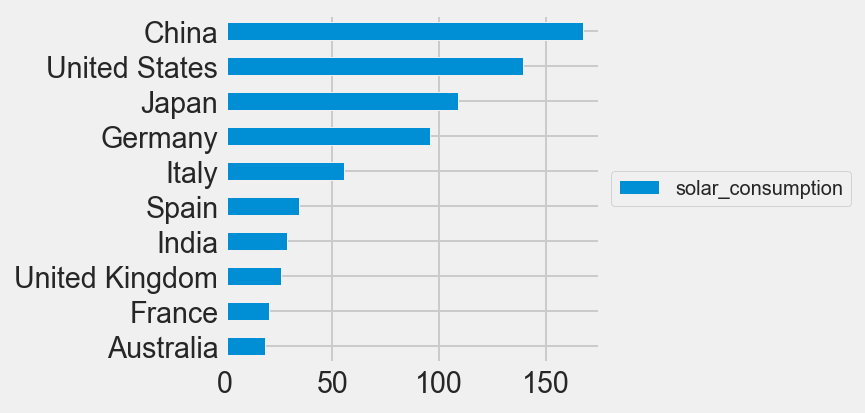

In [25]:
merged_ordered.tail(10).plot.barh(x='country', y=resource, figsize=(3,3))
plt.ylabel('')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [26]:
countries_list = merged_ordered.tail(10)['country'].to_list()
countries_list = list(reversed(countries_list))

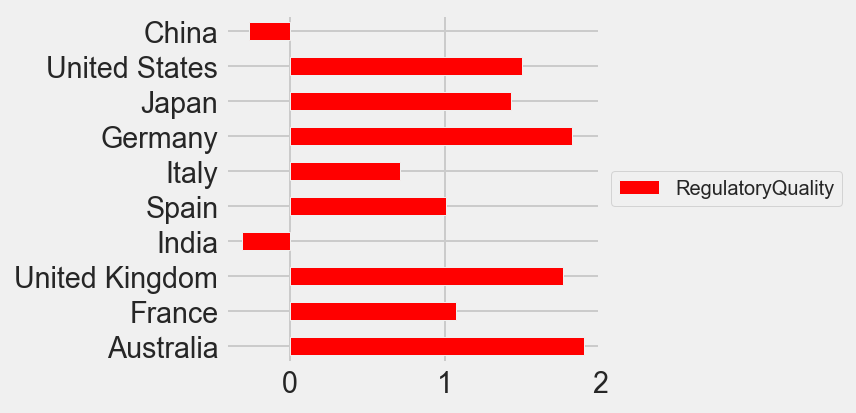

In [27]:
merged_ordered[merged_ordered['country'].isin(countries_list)].plot.barh(x='country', y='RegulatoryQuality', color='red', figsize=(3,3))
plt.ylabel('')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5));

## The least

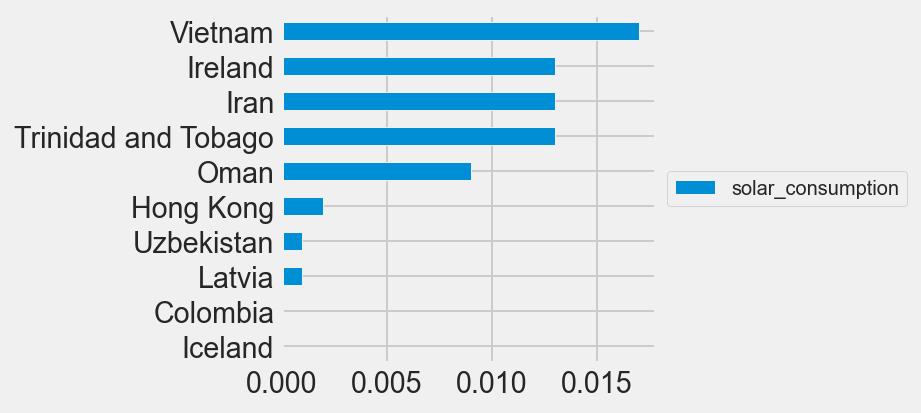

In [28]:
merged_ordered.head(10).plot.barh(x='country', y=resource, figsize=(3,3))
plt.ylabel('')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [29]:
countries_list = merged_ordered.head(10)['country'].to_list()
countries_list = list(reversed(countries_list))

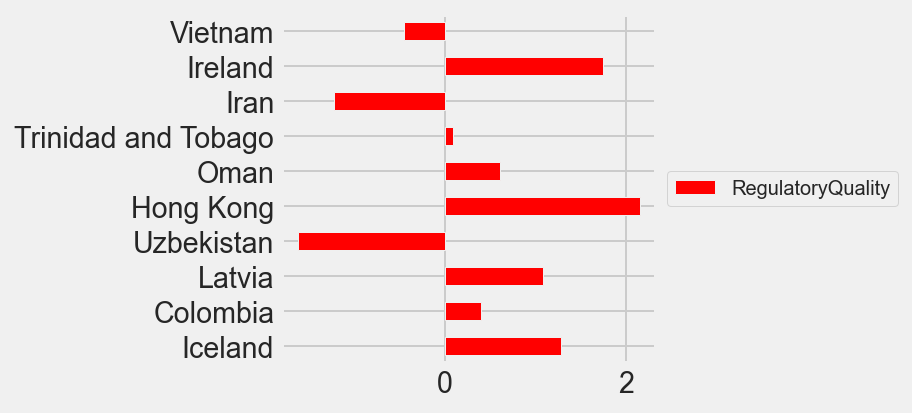

In [30]:
merged_ordered[merged_ordered['country'].isin(countries_list)].plot.barh(x='country', y='RegulatoryQuality', color='red', figsize=(3,3))
plt.ylabel('')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Table comparisson

In [31]:
# merged[merged['gov_type'] == 'Low'].count()